## Preprocessing and Exploratory Data Analysis

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Read csv file
dataset= pd.read_csv('spotify-2023.csv', encoding='latin-1')
dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Preprocessing

In [35]:
# Number of rows and columns before removing missing values
print("The dataset before dropping missing values contains", dataset.shape[0], "rows and ", dataset.shape[1], "columns")

# Remove in_shazam_charts column
dataset = dataset.drop(columns=['in_shazam_charts'])

# Drop missing values
dataset = dataset.dropna()

# Remove rows with non-integer values in column streams
dataset = dataset[dataset['streams'].str.isnumeric()]

# Number of rows and columns after removing missing values
print("The dataset after dropping missing values contains ", dataset.shape[0], "rows and ", dataset.shape[1], "columns")

The dataset before dropping missing values contains 953 rows and  24 columns
The dataset after dropping missing values contains  857 rows and  23 columns


### Basic statistics and some insights

In [10]:
# Number of unique artists
print("The number of unique artist names is", dataset['artist(s)_name'].nunique())

# Number of songs with more than 1 artist
print("The number of songs with more than 1 artist is", dataset[dataset['artist(s)_name'].str.contains(',')].shape[0])

# Song with the most streams
print("The song with the most streams is", dataset[dataset['streams'] == dataset['streams'].max()]['track_name'].values[0], "with", dataset['streams'].max(), "streams")

# Artist with the most streams
print("The artist with the most streams is", dataset[dataset['streams'] == dataset['streams'].max()]['artist(s)_name'].values[0])


The number of unique artist names is 596
The number of songs with more than 1 artist is 331
The song with the most streams is Anti-Hero with 999748277 streams
The artist with the most streams is Taylor Swift


/Users/yasmine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yasmine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yasmine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


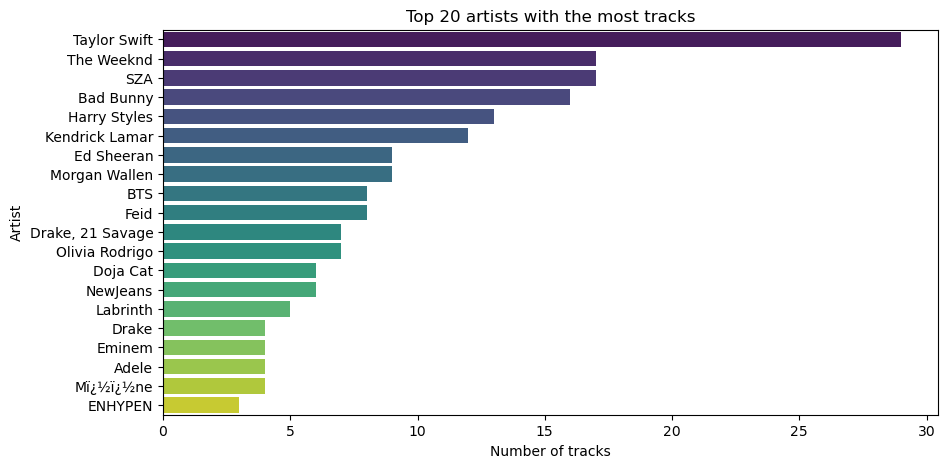

In [11]:
# Plot top 20 artists with the most tracks

top_artists = dataset['artist(s)_name'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.xlabel('Number of tracks')
plt.ylabel('Artist')
plt.title('Top 20 artists with the most tracks')
plt.show()

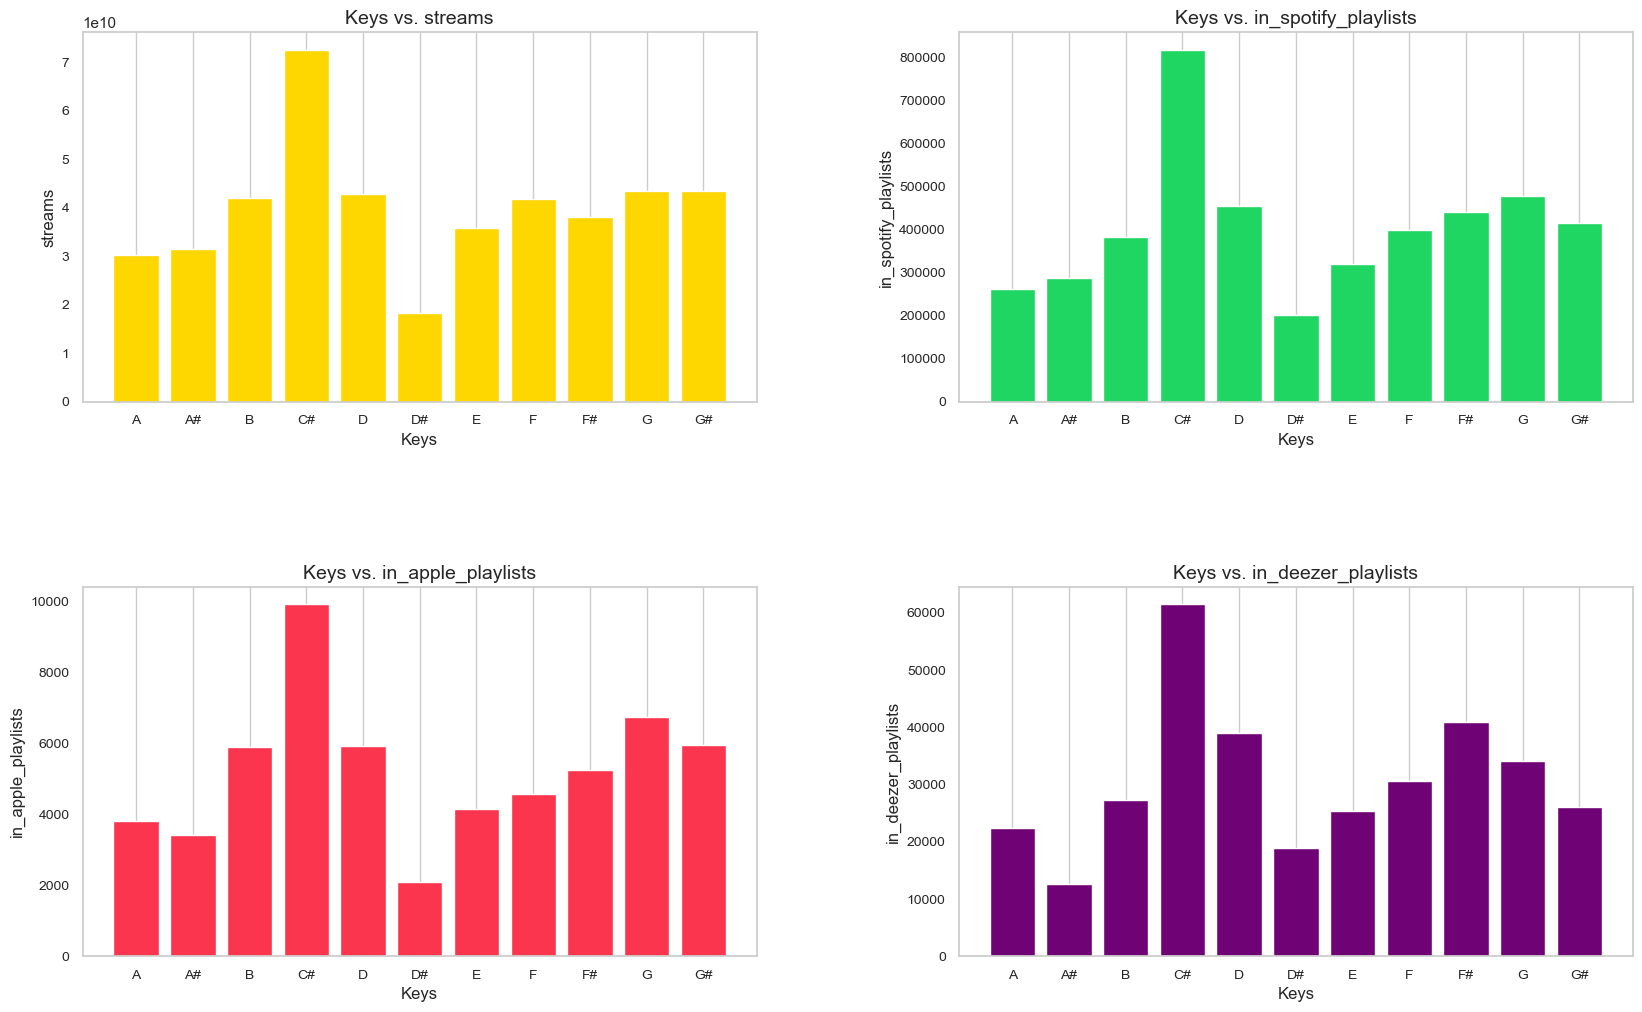

In [38]:
# Plot distribution of key column by streams column, in_spotify_playlists columns, in_apple_playlists column and in_deezer_playlists column

# Convert columns to integer
dataset['in_apple_playlists'] = dataset['in_apple_playlists'].astype(int)
dataset['in_deezer_playlists'] = dataset['in_deezer_playlists'].str.replace(',', '').astype(int)
dataset['streams'] = dataset['streams'].astype(int)

sum_columns_to_plot = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
colors = ["#FFD700", "#1FD662", "#FA354D", "#6F0375"]
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

axes = axes.flatten()

for i, column in enumerate(sum_columns_to_plot):
    sum_df = dataset.groupby('key')[column].sum().reset_index()
    plt.sca(axes[i])
    plt.bar(sum_df['key'], sum_df[column], width=0.8, align='center', color = colors[i])
    plt.ylabel(column, fontsize=12)
    plt.xlabel('Keys', fontsize=12)
    plt.title(f'Keys vs. {column}', fontsize=14)
    plt.grid(axis='y')
    plt.xticks(sum_df['key'], fontsize=10)
    plt.yticks(fontsize=10)


plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

/Users/yasmine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yasmine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yasmine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yasmine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

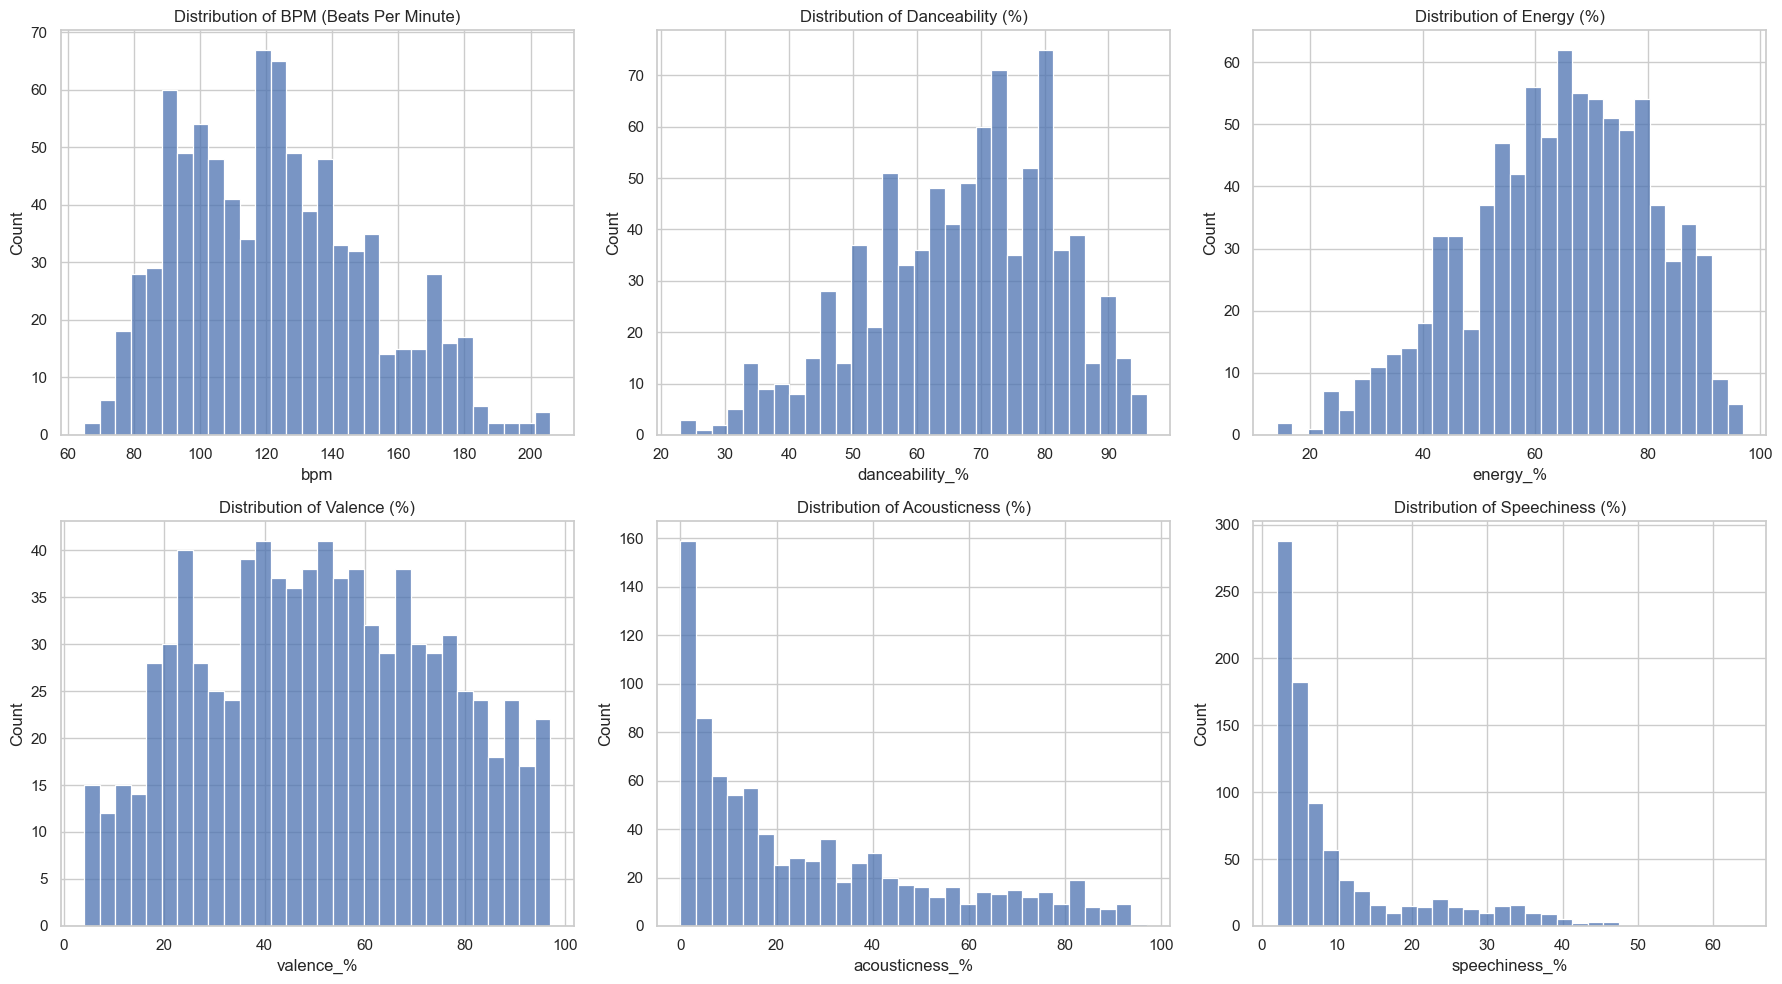

In [13]:

# Plot the distribution of the following columns: bpm, danceability, energy, valence, acousticness, speechiness

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# BPM (Beats Per Minute)
sns.histplot(dataset['bpm'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BPM (Beats Per Minute)')

# Danceability
sns.histplot(dataset['danceability_%'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Danceability (%)')

# Energy
sns.histplot(dataset['energy_%'], bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Energy (%)')

# Valence
sns.histplot(dataset['valence_%'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Valence (%)')

# Acousticness
sns.histplot(dataset['acousticness_%'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Acousticness (%)')

# Speechiness
sns.histplot(dataset['speechiness_%'], bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Speechiness (%)')

plt.tight_layout()
plt.show()